# Problem 3 

Cell 1 marks all the modified plotting functions that have been used for this problem. Cell 2 is the code for the problem, and has been well-documented. Running cell 3 displays all relevant plots and answers.

In [1]:
################################################
#  EE559 Hw5 Wk7, Prof. Jenkins, Spring 2022
#  Created by Fernando V. Monteiro, TA
################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def linear_decision_function(X, weight, labels):
    """
    Implements the perceptron decision function
    :param X: feature matrix of dimension NxD
    :param weight: weight vector of dimension 1xD
    :param labels: possible class assignments
    :return:
    """
    g_x = np.dot(X, weight)
    pred_label = np.zeros((X.shape[0], 1))
    pred_label[g_x > 0] = labels[0]
    pred_label[g_x < 0] = labels[1]
    return pred_label


def nonlinear_decision_function(X, weight, labels):
    """
    Implements a non linear decision function
    :param X: feature matrix of dimension NxD
    :param weight: weight vector of dimension 1xD
    :param labels: possible class assignments
    :return:
    """
    # Consider x1x2 and x1x1 as the most relevant features. Use this to construct the 
    # quadratic equation to fit the data. 
    X = np.column_stack((np.multiply(X[:,0], X[:,1]), np.multiply(X[:,1], X[:,1])))
    g_x = np.dot(X, weight)
    pred_label = np.zeros((X.shape[0], 1))
    pred_label[g_x > 0] = labels[0]
    pred_label[g_x < 0] = labels[1]
    return pred_label


def plot_perceptron_boundary(training, label_train, weight,
                             decision_function):
    """
    Plot the 2D decision boundaries of a linear classifier
    :param training: training data
    :param label_train: class labels correspond to training data
    :param weight: weights of a trained linear classifier. This
     must be a vector of dimensions (1, D)
    :param decision_function: a function that takes in a matrix with N
     samples and returns N predicted labels
    """

    if isinstance(training, pd.DataFrame):
        training = training.to_numpy()
    if isinstance(label_train, pd.DataFrame):
        label_train = label_train.to_numpy()

    # Total number of classes
    classes = np.unique(label_train)
    nclass = len(classes)

    class_names = []
    for c in classes:
        class_names.append('Class ' + str(int(c)))

    # Set the feature range for plotting
    max_x1 = np.ceil(np.max(training[:, 0])) + 1.0
    min_x1 = np.floor(np.min(training[:, 0])) - 1.0
    max_x2 = np.ceil(np.max(training[:, 1])) + 1.0
    min_x2 = np.floor(np.min(training[:, 1])) - 1.0

    xrange = (min_x1, max_x1)
    yrange = (min_x2, max_x2)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. This will be the basis of the decision
    # boundary visualization.
    (x1, x2) = np.meshgrid(np.arange(xrange[0], xrange[1] + inc / 100, inc),
                           np.arange(yrange[0], yrange[1] + inc / 100, inc))

    # size of the (x1, x2) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x1.shape
    # make (x1, x2) pairs as a bunch of row vectors.
    grid_2d = np.hstack((x1.reshape(x1.shape[0] * x1.shape[1], 1, order='F'),
                         x2.reshape(x2.shape[0] * x2.shape[1], 1, order='F')))

    # Labels for each (x1, x2) pair.
    pred_label = decision_function(grid_2d, weight, classes)

    # reshape the idx (which contains the class label) into an image.
    decision_map = pred_label.reshape(image_size, order='F')

    # create fig
    fig, ax = plt.subplots()
    # show the image, give each coordinate a color according to its class
    # label
    ax.imshow(decision_map, vmin=np.min(classes), vmax=9, cmap='Pastel1',
              extent=[xrange[0], xrange[1], yrange[0], yrange[1]],
              origin='lower')

    # plot the class training data.
    data_point_styles = ['rx', 'bo', 'g*']
    for i in range(nclass):
        ax.plot(training[label_train == classes[i], 0],
                training[label_train == classes[i], 1],
                data_point_styles[int(classes[i]) - 1],
                label=class_names[i])
    ax.legend()
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

    return fig


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

np.random.seed(0)

ROOTDIR = './data/h5w7_pr3_python_files/'
FILENAME = 'h5w7_data.csv'


class NonLinearMapping:
    
    def __init__(self, filepath):
        self.filepath = filepath

    def _get_features(self, path):
        """ Obtain the feature matrix and the corresponding labels.
        
        Parameters
        ----------
        path : str
            Path to the dataset.
        
        Returns
        -------
        x : ndarray
            Feature matrix of dimension N x D.
        y : ndarray
            Labels of dimension N x 1.
        """
        df = pd.read_csv(path, header = None)[1 : ]
        x, y = df.iloc[:, :-1].values.astype(float),\
               df.iloc[:, -1].values.astype(float)
        return x, y
    
    
    def _plot_feature_space(self, x, y):
        """
        Visualize the original feature space.

        Parameters
        ----------
        x : ndarray
            Feature matrix of dimension N x D.
        y : ndarray
            Labels of dimension N x 1.

        Returns
        -------
        None
        """
        
        #inspired from the utility function given above
        
        class_names = ['Class ' + str(int(c)) for c in np.unique(y)]
        classes = np.unique(y)
        style = ['rx', 'bo']
        for idx in range(len(classes)):
            plt.plot(x[y == classes[idx], 0],
                    x[y == classes[idx], 1],
                    style[idx],
                    label = class_names[idx])
        plt.legend(loc = 'upper right')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Feature space (non-augmented)')
        plt.tight_layout()
        plt.show()
        

    def _feature_space_expansion(self, x):
        """
        Expand the feature space using the feature vectors.
        [x1, x2] -> [x1, x2, x1x2, x1x1, x2x2]

        Parameters
        ----------
        x : ndarray
            Feature matrix of dimension N x D.
        
        Returns
        -------
        expanded_x : ndarray
            Expanded feature matrix of dimension N x (D + 3).
        """

        x1x2 = np.multiply(x[:, 0], x[:, 1]).reshape(-1, 1)
        x1x1 = np.multiply(x[:, 0], x[:, 0]).reshape(-1, 1)
        x2x2 = np.multiply(x[:, 1], x[:, 1]).reshape(-1, 1)
        expanded_x = np.hstack((x, x1x2, x1x1, x2x2))
        return expanded_x

    
    def _runner(self):
        """
        Runner module for the class.

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        
        # 3(a)
        print('3(a)')
        # Load the data
        x, y = self._get_features(self.filepath)
        # Plot the feature space (non-augmented)
        self._plot_feature_space(x, y)


        # 3(b)
        print('3(b)')
        # Fit the perceptron model
        model = Perceptron(fit_intercept = False).fit(x, y)
        # Obtain weights
        perceptron_weights = model.coef_[0]
        print(f'Classification score on the feature space: {model.score(x, y)}')

        # 3(c)
        print('3(c)')
        # Plot the decision boundary
        plot_perceptron_boundary(
            x, y, perceptron_weights, linear_decision_function
        )   


        # 3(d)
        print('3(d)')
        # Quadratic feature expansion
        expanded_x = self._feature_space_expansion(x)
        # Fit the perceptron model
        model.fit(expanded_x, y)
        # Obtain weights
        weights_newspace = model.coef_[0]
        # Classication accuracy
        score_newspace = model.score(expanded_x, y)
        print('Weight vector in the new feature space:', weights_newspace)
        print(f'Classification score on the expanded feature space: {score_newspace}')
        
        # 3(e)
        print('3(e)')
        # Obtain absolute weights of the expanded feature space
        abs_weights = np.abs(weights_newspace)
        # Get locations of the sorted absolute weights
        indices_locs = np.flip(np.argsort(abs_weights))
        # Consider relevant features according to the weights 
        relevant_feat_1, relevant_feat_2 = expanded_x[:, indices_locs[0]].reshape(-1, 1), \
                                           expanded_x[:, indices_locs[1]].reshape(-1, 1)
        # New feature space (2 dims) of relevant features
        phi_X_best = np.hstack((relevant_feat_1, relevant_feat_2))
        # Weights of the relevant features
        weights_best_2 = np.array([abs_weights[indices_locs[0]], abs_weights[indices_locs[1]]])
        # Plot the decision boundary
        plot_perceptron_boundary(
            phi_X_best, y, weights_best_2, linear_decision_function
        )

        # 3(f)
        # Nonlinear mapping (decision boundary)
        print('3(f)')
        plot_perceptron_boundary(
            x, y, perceptron_weights, nonlinear_decision_function
        )
        

3(a)


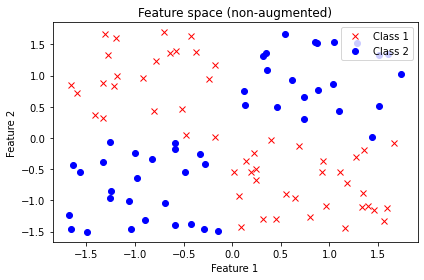

3(b)
Classification score on the feature space: 0.53
3(c)


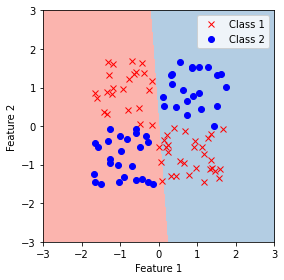

3(d)
Weight vector in the new feature space: [-0.10562188 -0.14390327  7.616127    0.05743614 -0.28634851]
Classification score on the expanded feature space: 1.0
3(e)


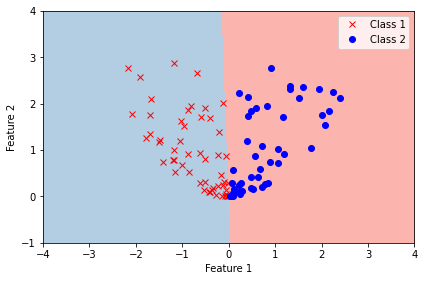

3(f)


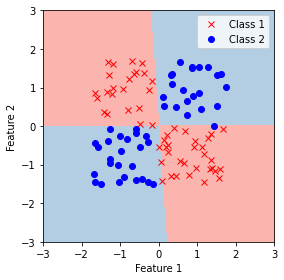

In [5]:
if __name__ == '__main__':
    filepath = os.path.join(ROOTDIR, FILENAME)
    hw = NonLinearMapping(filepath)
    hw._runner()